In [1]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import scipy.constants as sc
import os
from scipy.optimize import curve_fit
from pychromatic import Multiplot
from pychromatic.colors import accent

In [2]:
ev_to_j = sc.physical_constants["electron volt-joule relationship"][0]
Av =  sc.physical_constants["Avogadro constant"][0]
A_to_m = 1E-10
kB = sc.physical_constants["Boltzmann constant"][0]

Previously calculated MD values, can be recalculated using the script in fluctuations folder

In [16]:
temp = [600, 700, 800, 900, 1000, 1100, 1200]
cp = [26.3, 27.0, 27.4, 27.7, 28.4, 29.0, 29.9]
cperr = [0.3, 0.2, 0.2, 0.5, 0.4, 0.1, 0.3]

Experimental cp for copper

In [17]:
exptemp = [400, 450, 500, 550, 600, 650, 700, 800,900,1000, 1100, 1200, 1250, 1300]
expcp = [25.25, 25.61, 25.91, 26.21, 26.48, 26.73, 26.99, 27.48, 28.04, 28.66, 29.48, 30.53, 31.12, 32.16]

Now get from free energy

In [6]:
team, feam, ferream = np.loadtxt("free_energy/ts-FCC-400-0/temperature_sweep.dat", unpack=True)

## Entropy

$$
-S = \bigg ( \frac{dF}{dT} \bigg )_V
$$

Text(0, 0.5, 'S (eV/atom/K)')

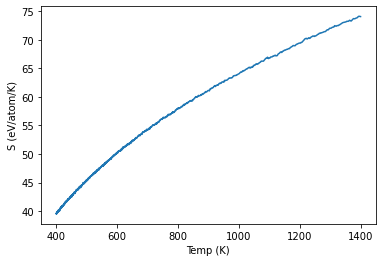

In [8]:
enteam = -np.gradient(feam, team)
sueam = (enteam*ev_to_j)/(1/Av)

plt.plot(team, sueam)
plt.xlabel("Temp (K)")
plt.ylabel("S (eV/atom/K)")

To remove the numeric noise, fit to the Shomate equation

In [9]:
def calc_cfit(t, a, b, c, d, e, f):
    return a*np.log(t) + b*t - c*(t**2)/2 + d*(t**3)/2 + e/(2*t**2) + f 

In [10]:
popteam, pcoveam = curve_fit(calc_cfit, team, sueam)

Create a range of fit temperatures

In [11]:
tfit = np.linspace(600, 1201, 10000)

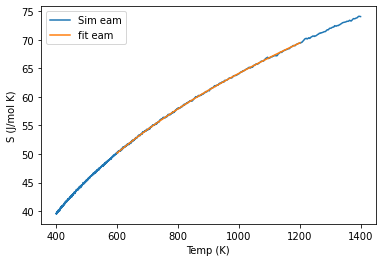

In [13]:
sufiteam = calc_cfit(tfit, popteam[0], popteam[1], popteam[2], popteam[3], popteam[4], popteam[5])

plt.plot(team, sueam, label="Sim eam")
plt.plot(tfit, sufiteam, label="fit eam")
plt.xlabel("Temp (K)")
plt.ylabel("S (J/mol K)")
plt.legend()

## Calculation of $c_p$ from free energy
$$
-S = \bigg ( \frac{dF}{dT} \bigg )_V
$$

$$
c_p = T\bigg ( \frac{dS}{dT} \bigg )_p
$$

In [14]:
cpeam = tfit*np.gradient(sufiteam, tfit)

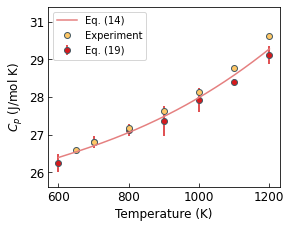

In [18]:
mlt = Multiplot(width=300, ratio=0.8)

mlt[0,0].plot(tfit, cpeam, color=accent["pred"],
             label="Eq. (14)", zorder=10)
mlt[0,0].errorbar(temp, cp, yerr=cperr, marker="o", 
                  ls="", color=accent["lred"], 
                  markeredgecolor=accent["lgrey"],
                  label="Eq. (19)", zorder=5)
mlt[0,0].plot(exptemp[5:-2],expcp[5:-2], 'o', color=accent["pyellow"],
             markeredgecolor=accent["lgrey"],
             zorder=8)
mlt[0,0].plot([1300], [1300], 'o', color=accent["pyellow"],
             markeredgecolor=accent["lgrey"],
             label="Experiment", zorder=100)
mlt[0,0].legend()
mlt[0,0].set_xlabel("Temperature (K)", fontsize=12)
mlt[0,0].set_ylabel(r"$C_p$ (J/mol K)", fontsize=12)

ticks = np.linspace(600, 1200, 4)
mlt[0,0].set_xticks(ticks)
mlt[0,0].set_xticklabels(["%d"%x for x in ticks], fontsize=12)
mlt[0,0].set_xlim(570, 1230)
mlt[0,0].set_ylim(25.5, 31.5)

ticks = np.linspace(26, 31, 5)
mlt[0,0].set_yticks(ticks)
mlt[0,0].set_yticklabels(["%d"%x for x in ticks], fontsize=12)
plt.savefig("cp_cu.png", dpi=300, bbox_inches="tight")